Dataset Shape: (235869, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235869 entries, 0 to 235868
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    235869 non-null  object 
 1   StockCode    235869 non-null  object 
 2   Description  235869 non-null  object 
 3   Quantity     235868 non-null  float64
 4   InvoiceDate  235868 non-null  object 
 5   UnitPrice    235868 non-null  float64
 6   CustomerID   235868 non-null  float64
 7   Country      235868 non-null  object 
 8   Total_Sales  235868 non-null  float64
dtypes: float64(4), object(5)
memory usage: 16.2+ MB
None

First 5 Rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365   

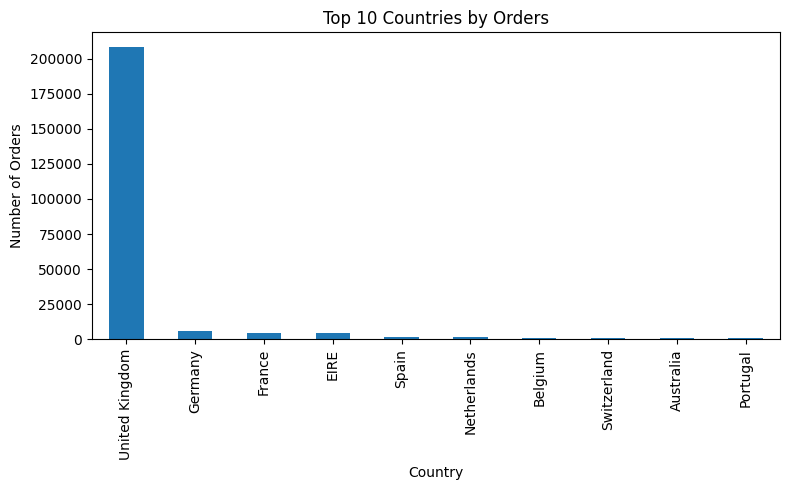

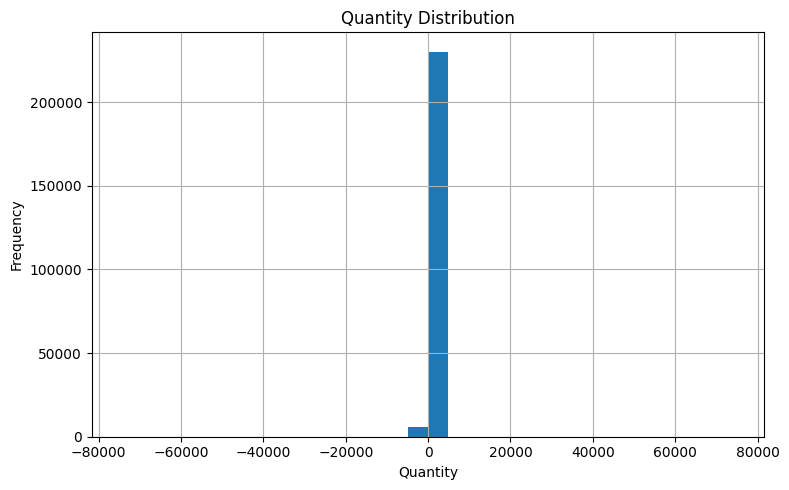

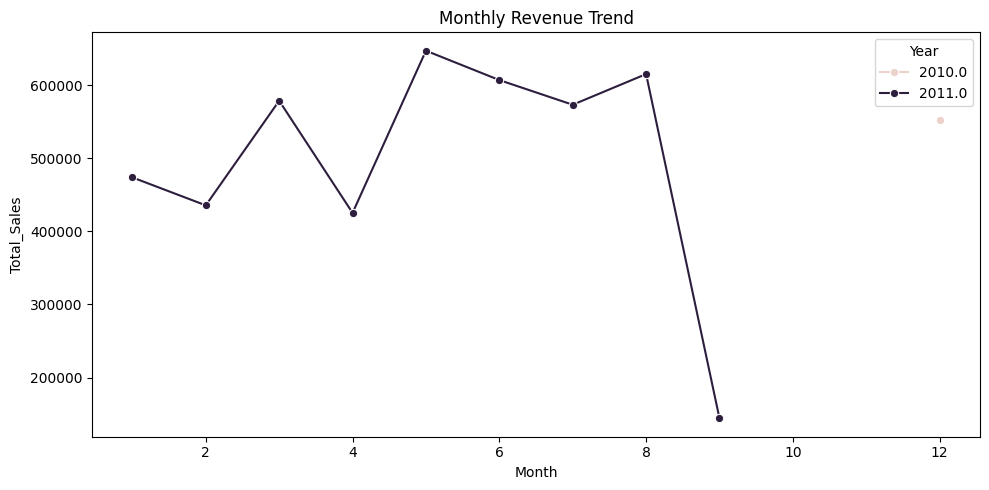

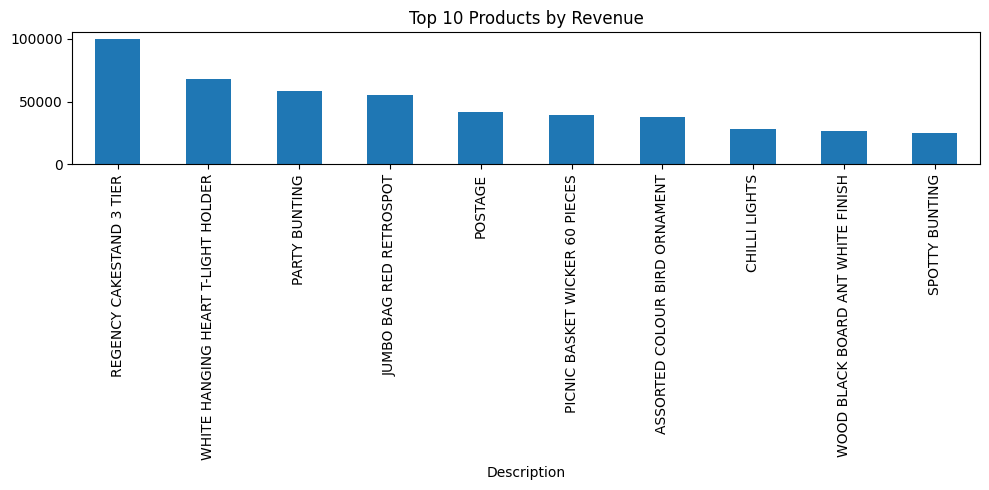

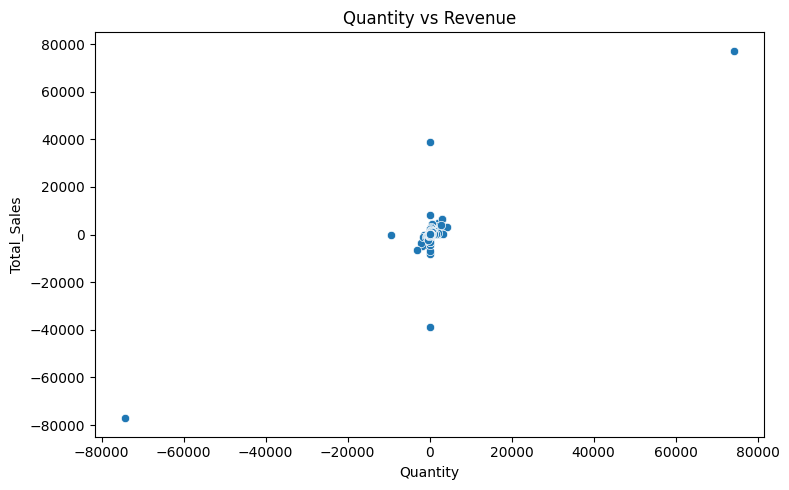

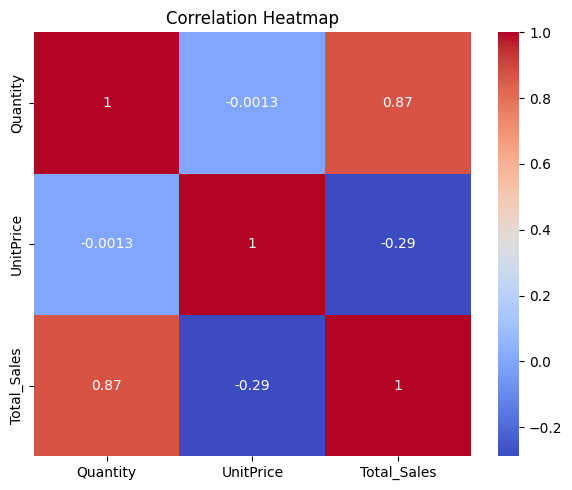


Top 5 Countries by Revenue:
Country
United Kingdom    4055511.572
Netherlands        179431.600
EIRE               167855.850
Germany            143108.460
France             113858.320
Name: Total_Sales, dtype: float64

✅ Task-2 EDA Completed Successfully!


In [2]:
# ==========================================
# TASK 2: EXPLORATORY DATA ANALYSIS (EDA)
# ApexPlanet Data Analytics Internship
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------
# 1. Load Dataset
# ------------------------------------------

df = pd.read_csv("/content/cleaned_data.csv")

print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

print("\nFirst 5 Rows:")
print(df.head())

# ------------------------------------------
# 2. Data Cleaning & Feature Engineering
# ------------------------------------------

# Convert to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Extract Year & Month
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month

print("\nMissing Values:")
print(df.isnull().sum())

print("\nSummary Statistics:")
print(df.describe())

# ------------------------------------------
# 3. KPI Metrics
# ------------------------------------------

total_revenue = df["Total_Sales"].sum()
total_orders = df["InvoiceNo"].nunique()
total_customers = df["CustomerID"].nunique()
avg_order_value = df["Total_Sales"].mean()

print("\n========== KPI SUMMARY ==========")
print("Total Revenue:", round(total_revenue,2))
print("Total Orders:", total_orders)
print("Total Customers:", total_customers)
print("Average Order Value:", round(avg_order_value,2))

# ------------------------------------------
# 4. Univariate Analysis
# ------------------------------------------

# Top 10 Countries by Orders
plt.figure(figsize=(8,5))
df["Country"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Countries by Orders")
plt.xlabel("Country")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

# Quantity Distribution
plt.figure(figsize=(8,5))
df["Quantity"].hist(bins=30)
plt.title("Quantity Distribution")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# ------------------------------------------
# 5. Multivariate Analysis
# ------------------------------------------

# Monthly Revenue Trend (Year + Month)
monthly_revenue = df.groupby(["Year","Month"])["Total_Sales"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_revenue, x="Month", y="Total_Sales", hue="Year", marker="o")
plt.title("Monthly Revenue Trend")
plt.tight_layout()
plt.show()

# Top 10 Products by Revenue
top_products = df.groupby("Description")["Total_Sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_products.plot(kind="bar")
plt.title("Top 10 Products by Revenue")
plt.tight_layout()
plt.show()

# Quantity vs Revenue
plt.figure(figsize=(8,5))
sns.scatterplot(x="Quantity", y="Total_Sales", data=df)
plt.title("Quantity vs Revenue")
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df[["Quantity","UnitPrice","Total_Sales"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# ------------------------------------------
# 6. Business Insights
# ------------------------------------------

top_countries = df.groupby("Country")["Total_Sales"].sum().sort_values(ascending=False).head(5)

print("\nTop 5 Countries by Revenue:")
print(top_countries)

# ------------------------------------------
# 7. Save Summary
# ------------------------------------------

summary_table = df.groupby("Country")["Total_Sales"].sum().reset_index()
summary_table.to_csv("eda_summary_by_country.csv", index=False)

print("\n✅ Task-2 EDA Completed Successfully!")